In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_all = pd.read_csv(
    "pv_cleaned_all.csv",
    parse_dates=["timestamp"]
)

df_all

,source_file,pv_power_w,timestamp,interval_minutes,is_generation,hour,day,month,weekday,pv_energy_kwh
0,26_measurements.csv,0.0,2015-02-28 23:00:00+00:00,NaN,False,23,2015-02-28,2,5,NaN
1,26_measurements.csv,0.0,2015-03-01 00:00:00+00:00,60.0,False,0,2015-03-01,3,6,0.0
2,26_measurements.csv,0.0,2015-03-01 01:00:00+00:00,60.0,False,1,2015-03-01,3,6,0.0
3,26_measurements.csv,0.0,2015-03-01 02:00:00+00:00,60.0,False,2,2015-03-01,3,6,0.0
4,26_measurements.csv,0.0,2015-03-01 03:00:00+00:00,60.0,False,3,2015-03-01,3,6,0.0
...,...,...,...,...,...,...,...,...,...,...
284035,28_measurements.csv,0.0,2025-12-17 18:00:00+00:00,60.0,False,18,2025-12-17,12,2,0.0
284036,28_measurements.csv,0.0,2025-12-17 19:00:00+00:00,60.0,False,19,2025-12-17,12,2,0.0
284037,28_measurements.csv,0.0,2025-12-17 20:00:00+00:00,60.0,False,20,2025-12-17,12,2,0.0
284038,28_measurements.csv,0.0,2025-12-17 21:00:00+00:00,60.0,False,21,2025-12-17,12,2,0.0


In [2]:
import os
os.getcwd()

'c:\\Users\\Hagen\\OneDrive\\HKA\\WS25-26\\Informatik2\\Matthias\\Hausarbeit\\Inf2-Hausarbeit-SolarAnalyse'

In [3]:
os.listdir()

['.git',
 'Bereinigt',
 'Daten_Bereinigung.py',
 'Hausarbeit.ipynb',
 'Metadaten',
 'pv_cleaned_all.csv',
 'README.md',
 'Rohdaten']

# Wie verändert sich die PV-Leistung im Tagesverlauf?

### Ziel der Analyse:
Ziel der Analyse ist es, den typischen Tagesverlauf der Photovoltaikanlage zu identifizieren. Dabei wird die erzeugte Leistung in Abhängigkeit von der Tageszeit betrachtet, um zu untersuchen, ob ein charakteristisches Muster erkennbar ist.

### Vorgang:
Für die Datenanalyse werden folgende Variablen aus dem Datensatz verwendet: Zeitstempel der Messung, PV-Leistung in Watt, und die Stunde des Tages. Als nächstes werden die Daten nach der Stunde des Tages gruppiert, und für jede einzelne Stunde der Mittelwert berechnet und anschließend Visualisiert.

Text(0.5, 1.0, 'Mittlerer Tagesverlauf der PV-Leistung')

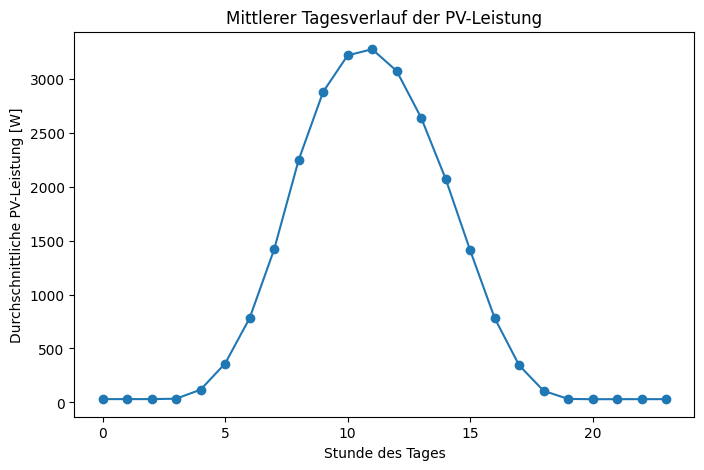

In [4]:
pv_hourly_mean=(
    df_all.groupby('hour')['pv_power_w'].mean().reset_index()
)
pv_hourly_mean

plt.figure(figsize=(8, 5))
plt.plot(pv_hourly_mean['hour'],pv_hourly_mean['pv_power_w'], marker="o")

plt.xlabel("Stunde des Tages")
plt.ylabel("Durchschnittliche PV-Leistung [W]")
plt.title("Mittlerer Tagesverlauf der PV-Leistung")

# Gibt es Saisonale Unterschiede in der PV- Erzeugung?


### Ziel der Analyse:

Ziel dieser Analyse ist es, saisonale Unterschiede in der Photovoltaik-Energieerzeugung zu untersuchen. Dabei soll analysiert werden, in welchem Ausmaß sich die Erträge zwischen den Jahreszeiten unterscheiden und ob die Sommermonate, wie aufgrund der höheren Sonneneinstrahlung zu erwarten, deutlich höhere Energieerträge liefern

### Vorgang:

Die Monate werden zu ihren jeweiligen Jahreszeiten zugeordnet. Anschließend wird für jede Jahreszeit ihren durchschnittlichen Wert der Photovoltaik-Anlage bestimmt. Auf Basis dieser Mittelwerte werden dann die saisonalen Unterschiede miteinander verglichen

Text(0.5, 0, 'Jahreszeiten')

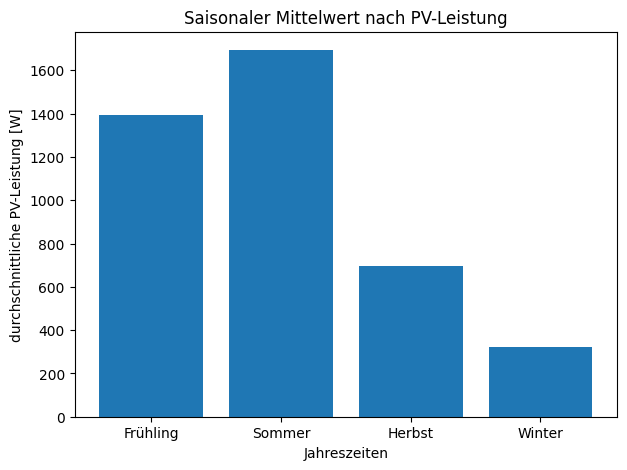

In [5]:
#Zuweisung der Monate zu ihrer Jahreszeit
df_fruehling= df_all[df_all["month"].isin([3,4,5])]
df_summer = df_all[df_all["month"].isin([6,7,8])]
df_autumm= df_all[df_all["month"].isin([9,10,11])]
df_winter = df_all[df_all["month"].isin([12,1,2])]

#berechnung der Mittelwerte
means = {
    "Frühling": df_fruehling["pv_power_w"].mean(),
    "Sommer": df_summer["pv_power_w"].mean(),
    "Herbst": df_autumm["pv_power_w"].mean(),
    "Winter": df_winter["pv_power_w"].mean()
}
#Umwandlung in Dataframe  
season_means = pd.DataFrame(
    list(means.items()),
    columns=["season", "mean_pv_power"])

plt.figure(figsize=(7, 5))
plt.bar(
    season_means["season"],
    season_means["mean_pv_power"])

plt.title("Saisonaler Mittelwert nach PV-Leistung")
plt.ylabel("durchschnittliche PV-Leistung [W]")
plt.xlabel("Jahreszeiten")

# Streuung der Pv - Anlage im Tagesverlauf?

### Ziel der Analyse:

Ziel der Analyse ist es, die Variabilität der Photovoltaik-Leistung im Tagesverlauf zu untersuchen. Dabei soll analysiert werden, zu welchen Tageszeiten die PV-Leistung stabil verläuft und in welchen Zeiträumen eine erhöhte Streuung der Erzeugung auftritt.

### Vorgang:

Die PV-Leistungsdaten wurden nach der Stunde des Tages gruppiert. Für jede Stunde wurden Boxplots erstellt, die die Verteilung der Leistungswerte über den gesamten Beobachtungszeitraum abbilden. Dadurch lassen sich Unterschiede in der Stabilität und Streuung der PV-Leistung im Tagesverlauf vergleichen.

<Figure size 1000x500 with 0 Axes>

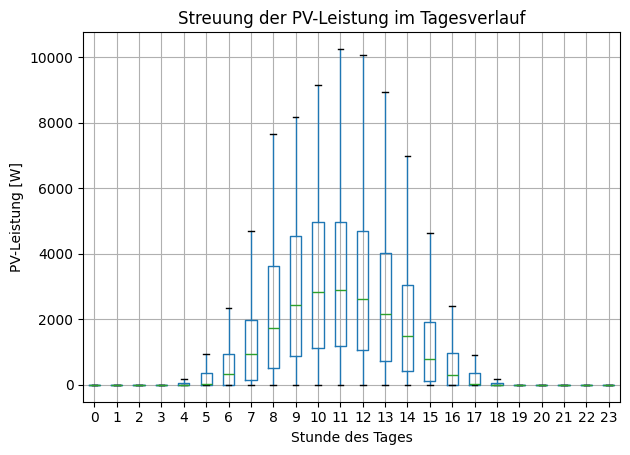

In [6]:
plt.figure(figsize=(10, 5))

df_all.boxplot(
    column="pv_power_w",
    by="hour",
    showfliers=False
)

plt.xlabel("Stunde des Tages")
plt.ylabel("PV-Leistung [W]")
plt.title("Streuung der PV-Leistung im Tagesverlauf")
plt.suptitle("")

plt.tight_layout()
plt.show()

## Wie viele Stunden am Tag erzeugen die Solaranlagen überhaupt Strom?



#### Ziel der Analyse 

... ist es, herauszufinden, wie viele Stunden pro Tag eine Solaranlage im Durchschnitt tatsächlich Strom erzeugt. Dadurch soll ein Überblick darüber gewonnen werden, wie lange die Anlagen täglich aktiv zur Stromproduktion beitragen.
Zusätzlich ermöglicht diese Auswertung einen Vergleich zwischen verschiedenen Solaranlagen sowie zwischen unterschiedlichen Monaten, sodass saisonale Schwankungen im Jahresverlauf sichtbar werden.

#### Vorgang: 

Es werden die täglichen Stunden an denen die Anlagen aktiv sind zusammengezählt und dann der monatliche Durchschnitt berechnet. 
Zur besseren Übersicht wurden auf der x-Achse nur alle drei Monate dargestellt.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Dateien & Leistungsspalten

anlagen = {
    "Anlage 26": ("Rohdaten/26_measurements.csv", "ems_26_pv_power_supply_w"),
    "Anlage 27": ("Rohdaten/27_measurements.csv", "ems_27_pv_power_supply_w"),
    "Anlage 28": ("Rohdaten/28_measurements.csv", "ems_28_pv_power_supply_w")
}

monthly_results = {}


# Verarbeitung

for name, (path, power_col) in anlagen.items():
    df = pd.read_csv(path, sep=";")

    # Zeitstempel
    df["t_local"] = pd.to_datetime(df["t_local"])

    # Leistung in Zahl umwandeln
    df[power_col] = (
        df[power_col]
        .astype(str)
        .str.replace(",", ".", regex=False)
    )
    df[power_col] = pd.to_numeric(df[power_col], errors="coerce")

    # Datum
    df["date"] = df["t_local"].dt.date

    # Stromerzeugung ja/nein
    df["producing"] = df[power_col] > 0

    # Stunden mit Strom pro Tag
    hours_per_day = df.groupby("date")["producing"].sum().reset_index()

    # Monat extrahieren (KORREKT)
    hours_per_day["date"] = pd.to_datetime(hours_per_day["date"])
    hours_per_day["month"] = hours_per_day["date"].dt.to_period("M")

    # Monatsdurchschnitt
    monthly_avg = hours_per_day.groupby("month")["producing"].mean()

    monthly_results[name] = monthly_avg

# Diagramm

plt.figure(figsize=(10, 5))

x_values = monthly_df.index.astype(str)

for col in monthly_df.columns:
    plt.plot(x_values, monthly_df[col], marker="o", label=col)

# X-Achse: nur alle 3 Monate beschriften
tick_positions = range(0, len(x_values), 3)
tick_labels = x_values[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)

# Y-Achse: Stunden in 2er-Schritten
y_max = int(monthly_df.max().max()) + 1
plt.yticks(range(0, y_max + 1, 2))

plt.xlabel("Monat")
plt.ylabel("Ø Stunden mit Strom pro Tag")
plt.title("Monatlicher Durchschnitt der Solarstrom-Erzeugung")
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'monthly_df' is not defined

<Figure size 1000x500 with 0 Axes>

#### Fazit: 

Man kann hier eine sehr schöne Kurve erkennen, die eine Periodendauer von einem Jahr hat. Diese Kurve ist darauf zurückzuführen, dass es im Sommer mehr tägliche Sonnenstunden hat als im Winter. Die Analyse zeigt somit anschaulich den starken Einfluss der Jahreszeiten auf die Leistungsfähigkeit von Solaranlagen.

## Wie verändert sich der Zeitpunkt der maximalen Leistung im Jahresverlauf?

#### Ziel der Analyse

... ist es zu untersuchen, zu welchem Zeitpunkt am Tag die Solaranlagen ihre höchste Leistung erzeugen. Dabei wird betrachtet, ob sich der Zeitpunkt der maximalen Energieerzeugung im Verlauf des Jahres verändert und ob Unterschiede zwischen den einzelnen Anlagen bestehen.


#### Vorgang: 

Für jede Solaranlage wurde pro Tag der Zeitpunkt der maximalen Leistung bestimmt.
Diese Zeitpunkte wurden anschließend zu monatlichen Durchschnittswerten zusammengefasst.
Zur besseren Übersicht wurden auf der x-Achse nur alle drei Monate dargestellt.


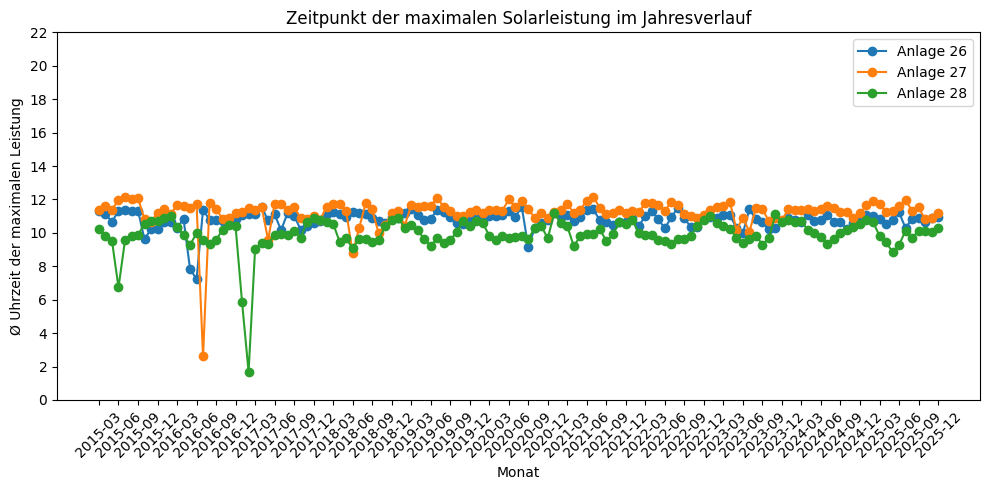

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Dateien & Leistungsspalten

anlagen = {
    "Anlage 26": ("Rohdaten/26_measurements.csv", "ems_26_pv_power_supply_w"),
    "Anlage 27": ("Rohdaten/27_measurements.csv", "ems_27_pv_power_supply_w"),
    "Anlage 28": ("Rohdaten/28_measurements.csv", "ems_28_pv_power_supply_w")
}

monthly_results = {}


# Verarbeitung

for name, (path, power_col) in anlagen.items():
    df = pd.read_csv(path, sep=";")

    # Zeitstempel
    df["t_local"] = pd.to_datetime(df["t_local"])

    # Leistung in Zahl umwandeln
    df[power_col] = (
        df[power_col]
        .astype(str)
        .str.replace(",", ".", regex=False)
    )
    df[power_col] = pd.to_numeric(df[power_col], errors="coerce")

    # Datum & Stunde
    df["date"] = df["t_local"].dt.date
    df["hour"] = df["t_local"].dt.hour

    # Nur positive Leistungen
    df_pos = df[df[power_col] > 0].copy()

    # Zeitpunkt der maximalen Leistung pro Tag
    idx = df_pos.groupby("date")[power_col].idxmax()
    idx = idx.dropna().astype(int)

    daily_max = df_pos.loc[idx].copy()
    daily_max["date"] = pd.to_datetime(daily_max["date"])
    daily_max["month"] = daily_max["date"].dt.to_period("M")

    # Monatlicher Durchschnitt der Uhrzeit
    monthly_mean = daily_max.groupby("month")["hour"].mean()

    monthly_results[name] = monthly_mean


# Vergleichs-DataFrame

monthly_df = pd.DataFrame(monthly_results)


# Diagramm

plt.figure(figsize=(10, 5))

x_values = monthly_df.index.astype(str)

for col in monthly_df.columns:
    plt.plot(x_values, monthly_df[col], marker="o", label=col)

# X-Achse: nur alle 3 Monate
tick_positions = range(0, len(x_values), 3)
tick_labels = x_values[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)

# Y-Achse: 2-Stunden-Schritte
plt.yticks(range(0, 24, 2))

plt.xlabel("Monat")
plt.ylabel("Ø Uhrzeit der maximalen Leistung")
plt.title("Zeitpunkt der maximalen Solarleistung im Jahresverlauf")
plt.legend()
plt.tight_layout()
plt.show()


#### Fazit: 
Anlage 28 erreicht ihr Leistungsmaximum im Vergleich zu den anderen Anlagen früher am Tag. Dies lässt sich durch die Ausrichtung der Anlage nach Südosten erklären.
Die Sonne geht im Winter eher südöstlich und im Sommer nordöstlich auf. Entsprechend wird in den Wintermonaten der Zeitpunkt der maximalen Leistung früher am Tag erreicht als in den Sommermonaten. Dieser saisonale Effekt ist in den ausgewerteten Daten deutlich erkennbar.(Grüne Kurve)

(Ausreißer nicht beachtet)

### Wie zuverlässig sind die Solaranlagen im Bezug auf eine vorhersehbare Stromproduktion?

#### Ziel der Analyse 

... ist es, herauszufinden, wie gut die produzierte Energie vorhersagbar ist, um eine bessere Planung zu ermöglichen.
Dabei wird untersucht, inwieweit sich regelmäßige Muster im vergangen Verlauf der Stromerzeugung erkennen lassen.

#### Vorgang: 

Es werden die wöchentlichen Energieerträge aufsummiert, indem die gemessenen Leistungswerte einer Woche zusammengefasst werden. Anschließend werden diese wöchentlichen Gesamtwerte über den gesamten Betrachtungszeitraum dargestellt, sodass man sie vergleichen kann. 

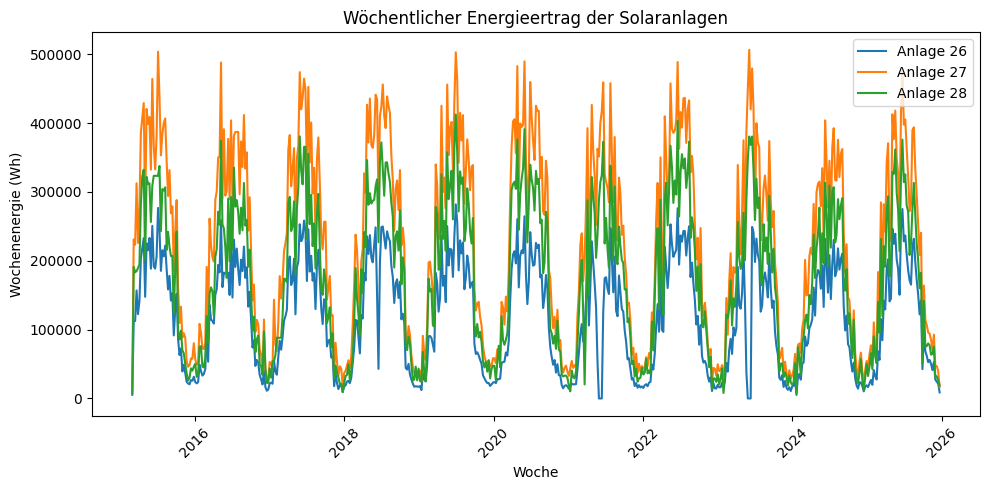

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Dateien & Leistungsspalten

anlagen = {
    "Anlage 26": ("Rohdaten/26_measurements.csv", "ems_26_pv_power_supply_w"),
    "Anlage 27": ("Rohdaten/27_measurements.csv", "ems_27_pv_power_supply_w"),
    "Anlage 28": ("Rohdaten/28_measurements.csv", "ems_28_pv_power_supply_w")
}

weekly_energy_results = {}
stats = {}

# Verarbeitung

for name, (path, power_col) in anlagen.items():
    df = pd.read_csv(path, sep=";")

    # Zeit vorbereiten
    df["t_local"] = pd.to_datetime(df["t_local"])
    df.set_index("t_local", inplace=True)

    # Leistung numerisch machen
    df[power_col] = (
        df[power_col]
        .astype(str)
        .str.replace(",", ".", regex=False)
    )
    df[power_col] = pd.to_numeric(df[power_col], errors="coerce")

    # Wöchentlicher Energieertrag (Wh)
    weekly_energy = df[power_col].resample("W").sum()

    weekly_energy_results[name] = weekly_energy


# Diagramm: wöchentlicher Energieertrag

plt.figure(figsize=(10, 5))

for name, energy in weekly_energy_results.items():
    plt.plot(energy.index, energy.values, label=name)

plt.xlabel("Woche")
plt.ylabel("Wochenenergie (Wh)")
plt.title("Wöchentlicher Energieertrag der Solaranlagen")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Fazit:

Die Analyse zeigt einen deutlichen saisonalen Verlauf der wöchentlichen Energieerträge. Während im Sommer hohe Erträge erzielt werden, sinkt die Stromproduktion im Winter deutlich ab. Langfristig ist die Stromproduktion jedoch regelmäßig und gut vorhersehbar, wobei Unterschiede zwischen den einzelnen Anlagen erkennbar sind, welche auf die unterschiedlichen Leistungen zurückzuführen sind. 

Anlage 27 (11,75 kWp), Anlage 28 (9,24kWp), Anlage 26 (7,44 kWp) (kwp=Kilowatt-peak)

# Wie entwickeln sich die Einnahmen der PV-Anlage über verschiedene Zeiträume?

In [10]:
df26 = df_all[df_all["source_file"] == "26_measurements.csv"].copy()

# 3) Einspeisetarif (aus Metadaten Anlage 26)
EINSPEIS_TARIF = 0.185  # € pro kWh

# 4) Einnahmen pro Messintervall berechnen
df26["revenue_eur"] = df26["pv_energy_kwh"] * EINSPEIS_TARIF

### Einnahmen pro Tag

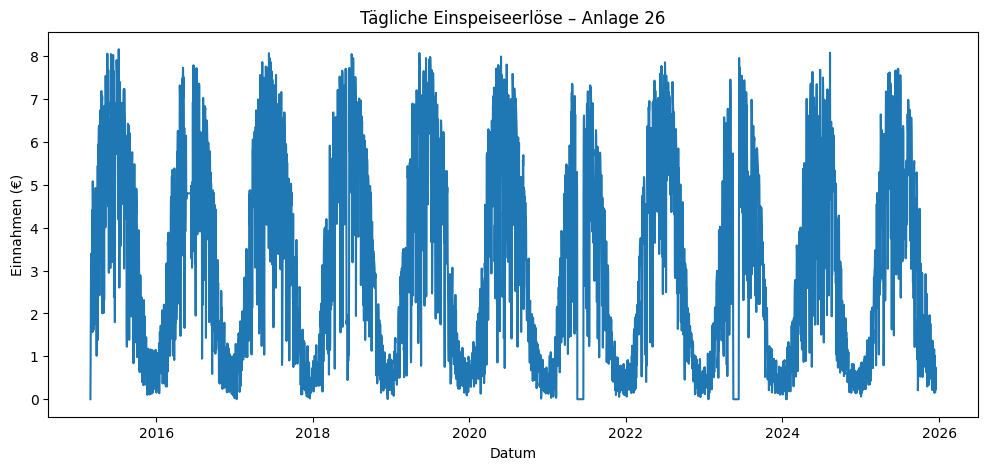

In [11]:
daily_revenue = (
    df26
    .groupby(df26["timestamp"].dt.date)["revenue_eur"]
    .sum()
)

plt.figure(figsize=(12, 5))
daily_revenue.plot()
plt.xlabel("Datum")
plt.ylabel("Einnahmen (€)")
plt.title("Tägliche Einspeiseerlöse – Anlage 26")
plt.show()

### Einnahmen pro Monat

C:\Users\Hagen\AppData\Local\Temp\ipykernel_19508\2947337560.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .groupby(df26["timestamp"].dt.to_period("M"))["revenue_eur"]


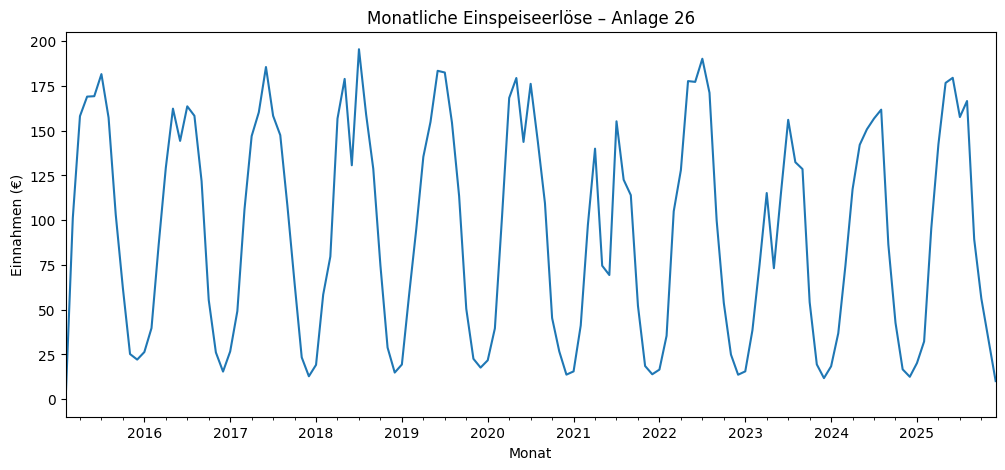

In [12]:
monthly_revenue = (
    df26
    .groupby(df26["timestamp"].dt.to_period("M"))["revenue_eur"]
    .sum()
)

plt.figure(figsize=(12, 5))
monthly_revenue.plot()
plt.xlabel("Monat")
plt.ylabel("Einnahmen (€)")
plt.title("Monatliche Einspeiseerlöse – Anlage 26")
plt.show()

### Einnahmen pro Jahr

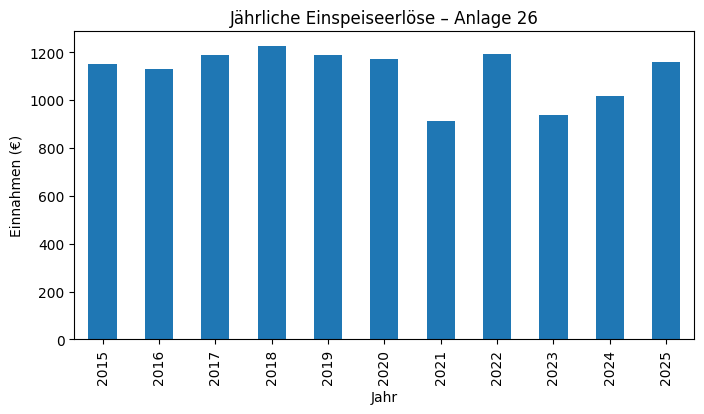

In [13]:
yearly_revenue = (
    df26
    .groupby(df26["timestamp"].dt.year)["revenue_eur"]
    .sum()
)

plt.figure(figsize=(8, 4))
yearly_revenue.plot(kind="bar")
plt.xlabel("Jahr")
plt.ylabel("Einnahmen (€)")
plt.title("Jährliche Einspeiseerlöse – Anlage 26")
plt.show()

# Welche Anlage generiert am meisten Gewinn pro installierter kWp?

### Annahme: Alle anlagen haben den gleichen Tarif

In [15]:
df26 = df_all[df_all["source_file"] == "26_measurements.csv"].copy()
df27 = df_all[df_all["source_file"] == "27_measurements.csv"].copy()
df28 = df_all[df_all["source_file"] == "28_measurements.csv"].copy()

# Annahme: gleicher Einspeisetarif für alle Anlagen
EINSPEIS_TARIF = 0.185  # €/kWh

# installierte Leistung aus Metadaten (kWp)
KWPS = {
    "26": 7.44,
    "27": 11.75,
    "28": 9.24,
}

# Jahreserlös pro Anlage (Durchschnitt über die Jahre)
def annual_revenue(df: pd.DataFrame) -> float:
    df = df.copy()  # verhindert Seiteneffekte
    df["revenue_eur"] = df["pv_energy_kwh"] * EINSPEIS_TARIF
    return df.groupby(df["timestamp"].dt.year)["revenue_eur"].sum().mean()

rev26 = annual_revenue(df26)
rev27 = annual_revenue(df27)
rev28 = annual_revenue(df28)

# Vergleichstabelle
comparison = pd.DataFrame({
    "Anlage": ["26", "27", "28"],
    "Jahreserlös (€)": [rev26, rev27, rev28],
    "Leistung (kWp)": [KWPS["26"], KWPS["27"], KWPS["28"]],
})

comparison["€ pro kWp"] = comparison["Jahreserlös (€)"] / comparison["Leistung (kWp)"]

# Tabelle anzeigen
comparison

,Anlage,Jahreserlös (€),Leistung (kWp),€ pro kWp
0,26,1115.381427,7.44,149.916858
1,27,2162.942872,11.75,184.080244
2,28,1669.098968,9.24,180.638416


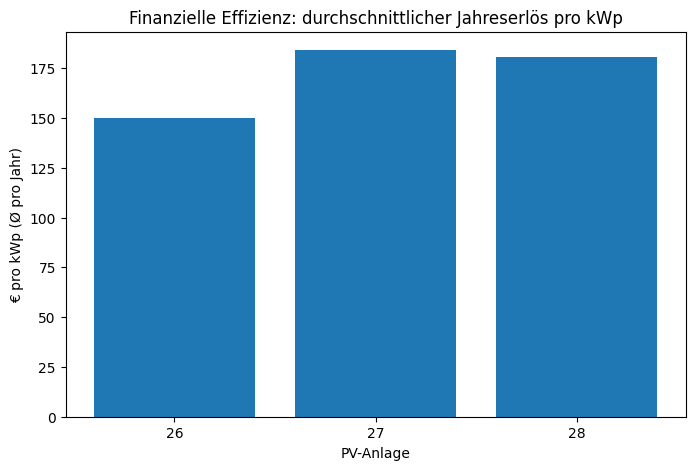

In [16]:
plt.figure(figsize=(8, 5))
plt.bar(comparison["Anlage"], comparison["€ pro kWp"])
plt.xlabel("PV-Anlage")
plt.ylabel("€ pro kWp (Ø pro Jahr)")
plt.title("Finanzielle Effizienz: durchschnittlicher Jahreserlös pro kWp")
plt.show()

# Amortisationszeit Anlage 26

### Annahme: Investitionskosten von 1600 € por kWp

In [17]:
EINSPEIS_TARIF = 0.185  # €/kWh

INVEST_KOSTEN_PRO_KWP = 1600  # €
KWP_26 = 7.44

INVEST_26 = INVEST_KOSTEN_PRO_KWP * KWP_26
INVEST_26


11904.0

In [18]:
df26["revenue"] = df26["pv_energy_kwh"] * EINSPEIS_TARIF

annual_revenue = (
    df26
    .groupby(df26["timestamp"].dt.year)["revenue"]
    .sum()
    .mean()
)

annual_revenue

np.float64(1115.3814270541252)

In [19]:
amortisation_years = INVEST_26 / annual_revenue
amortisation_years

np.float64(10.672582231748372)

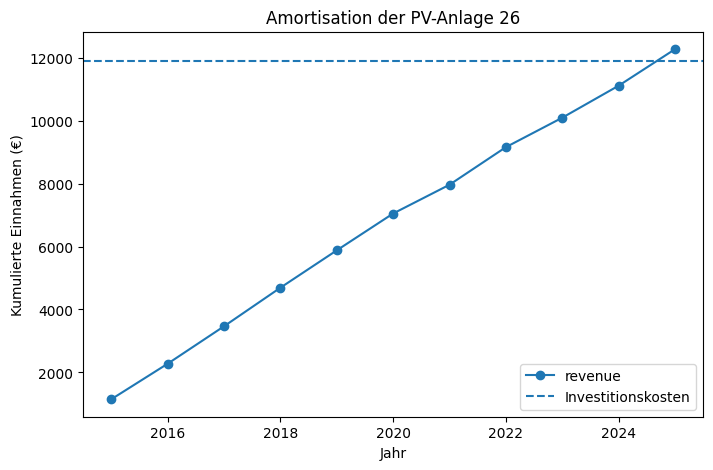

In [20]:
yearly_revenue = (
    df26
    .groupby(df26["timestamp"].dt.year)["revenue"]
    .sum()
)

cumulative = yearly_revenue.cumsum()

plt.figure(figsize=(8, 5))
cumulative.plot(marker="o")
plt.axhline(INVEST_26, linestyle="--", label="Investitionskosten")
plt.ylabel("Kumulierte Einnahmen (€)")
plt.xlabel("Jahr")
plt.title("Amortisation der PV-Anlage 26")
plt.legend()
plt.show()